In [1]:
import pandas as pd
import numpy as np
import os

In [128]:
# fixes issues with matplotlib
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
os.getcwd()

'D:\\COLLEGE\\PROJECTS\\gen_letter'

Dataset link- https://www.kaggle.com/datasets/shanmukh05/anime-names-and-image-generation

In [4]:
df = pd.read_csv('final_names.csv')
df.head()

,Unnamed: 0,0
0,0,Pie_a_La_Mode
1,1,Celica_A_Mercury
2,2,Konoe_A_Mercury
3,3,Priapus_A_Tarou
4,4,Faalala_Aa_Larm


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72776 entries, 0 to 72775
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72776 non-null  int64 
 1   0           72776 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72776 entries, 0 to 72775
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       72776 non-null  object
dtypes: object(1)
memory usage: 568.7+ KB


In [7]:
df['0']

0            Pie_a_La_Mode
1         Celica_A_Mercury
2          Konoe_A_Mercury
3          Priapus_A_Tarou
4          Faalala_Aa_Larm
               ...        
72771           Finn_Zweig
72772    Albert_Zweinstein
72773               Zwetti
72774      Shenfa_Zwitoque
72775       Dezember_Zwolf
Name: 0, Length: 72776, dtype: object

In [8]:
words = []
for i in range(len(df)):
    words.append((df.iloc[i, 0]).lower())

words

['pie_a_la_mode',
 'celica_a_mercury',
 'konoe_a_mercury',
 'priapus_a_tarou',
 'faalala_aa_larm',
 'torry_aaes',
 'angel_aaltonen',
 'diana_aaman',
 'itsue_aasu',
 'futaba_aasu',
 'hitomi_aasu',
 'nanase_aasu',
 'mitsuki_aasu',
 'mutsumi_aasu',
 'shii_aasu',
 'lashara_aasu_xxviii',
 'kim_aba',
 'iouri_abalkin',
 'renji_abarai',
 'ichika_abarai',
 'robert_abarth',
 'kikunosuke_abashiri',
 'naojirou_abashiri',
 'daemon_abashiri',
 'kichiza_abashiri',
 'goemon_abashiri',
 'naojiro_abashiri',
 'youhei_abashiri',
 'kinzou_abashiri',
 'sosuke_abayama',
 'leone_abbacchio',
 'iino_abbav',
 'fred_abberline',
 'tiffany_abbot',
 'judy_abbott',
 'abbott',
 'majorca_abbott',
 'zach_abdullah',
 'saki_abdusha',
 'takaya_abe',
 'takakazu_abe',
 'katsuya_abe',
 'narumi_abe',
 'kakeru_abe',
 'osamu_abe',
 'shinzo_abe',
 'mitsuru_abe',
 'misae_abe',
 'shousei_abe',
 'shun_abe',
 'tamotsu_abe',
 'seimei_abe',
 'rika_abe',
 'takahiro_abe',
 'kotarou_abe',
 'gonji_abe',
 'hiroshi_abe',
 'jun_abe',
 'tamaki

In [9]:
len(words)

72776

In [10]:
min(len(w) for w in words), max(len(w) for w in words)

(2, 52)

### A bigram or digram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. A bigram is an n-gram for n=2. ~ Wikipedia

In [11]:
mp = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # <S> and <E> are special start and end characters respectively.
    for c1, c2 in zip(chs, chs[1:]):
        bigram = (c1, c2)
        mp[bigram] = mp.get(bigram, 0) + 1

In [12]:
mp

{('<S>', 'p'): 587,
 ('p', 'i'): 253,
 ('i', 'e'): 1778,
 ('e', '_'): 7186,
 ('_', 'a'): 5251,
 ('a', '_'): 13766,
 ('_', 'l'): 1479,
 ('l', 'a'): 2042,
 ('_', 'm'): 7242,
 ('m', 'o'): 6008,
 ('o', 'd'): 1003,
 ('d', 'e'): 2031,
 ('e', '<E>'): 5759,
 ('<S>', 'c'): 2259,
 ('c', 'e'): 625,
 ('e', 'l'): 2582,
 ('l', 'i'): 2396,
 ('i', 'c'): 3708,
 ('c', 'a'): 1055,
 ('m', 'e'): 3169,
 ('e', 'r'): 5577,
 ('r', 'c'): 315,
 ('c', 'u'): 184,
 ('u', 'r'): 7931,
 ('r', 'y'): 1903,
 ('y', '<E>'): 633,
 ('<S>', 'k'): 8816,
 ('k', 'o'): 9967,
 ('o', 'n'): 5998,
 ('n', 'o'): 7879,
 ('o', 'e'): 618,
 ('p', 'r'): 206,
 ('r', 'i'): 10619,
 ('i', 'a'): 2276,
 ('a', 'p'): 245,
 ('p', 'u'): 109,
 ('u', 's'): 3697,
 ('s', '_'): 1339,
 ('_', 't'): 5965,
 ('t', 'a'): 11506,
 ('a', 'r'): 11897,
 ('r', 'o'): 7319,
 ('o', 'u'): 12177,
 ('u', '<E>'): 5672,
 ('<S>', 'f'): 1448,
 ('f', 'a'): 706,
 ('a', 'a'): 227,
 ('a', 'l'): 2124,
 ('r', 'm'): 229,
 ('m', '<E>'): 408,
 ('<S>', 't'): 5601,
 ('t', 'o'): 10074,
 (

In [13]:
sorted(mp.items(), key = lambda x : -x[1])

[(('h', 'i'), 24420),
 (('a', '<E>'), 23618),
 (('k', 'a'), 19008),
 (('i', '<E>'), 17936),
 (('i', '_'), 16915),
 (('a', 'k'), 15548),
 (('m', 'i'), 15390),
 (('s', 'h'), 14966),
 (('k', 'i'), 14568),
 (('m', 'a'), 14548),
 (('a', '_'), 13766),
 (('a', 'n'), 13204),
 (('o', '_'), 12602),
 (('s', 'a'), 12267),
 (('o', 'u'), 12177),
 (('n', 'a'), 12025),
 (('a', 'r'), 11897),
 (('s', 'u'), 11833),
 (('r', 'a'), 11784),
 (('t', 'a'), 11506),
 (('r', 'i'), 10619),
 (('i', 'n'), 10609),
 (('_', 'k'), 10105),
 (('t', 'o'), 10074),
 (('a', 'm'), 9981),
 (('k', 'o'), 9967),
 (('u', 'k'), 9289),
 (('y', 'a'), 9268),
 (('_', 's'), 9255),
 (('<S>', 'm'), 9243),
 (('u', '_'), 8974),
 (('<S>', 'k'), 8816),
 (('<S>', 's'), 8586),
 (('a', 's'), 8562),
 (('c', 'h'), 8395),
 (('h', 'a'), 8337),
 (('a', 't'), 7984),
 (('u', 'r'), 7931),
 (('n', 'o'), 7879),
 (('r', 'o'), 7319),
 (('k', 'u'), 7286),
 (('_', 'm'), 7242),
 (('e', '_'), 7186),
 (('o', '<E>'), 7133),
 (('i', 'k'), 6714),
 (('i', 'r'), 6704)

In [14]:
# !pip install torch

# Bigram model (Statistical model)

In [15]:
import torch

In [16]:
a = torch.zeros((3, 5), dtype = torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [17]:
a[1, 3] = 2
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [18]:
for i in range(len(words)):
    if '-' in words[i]:
        words[i] = words[i].replace('-', '_')

In [19]:
temp = []
for w in words:
    if '#' not in w:
        temp.append(w)

words = temp.copy()

In [20]:
st = set()
for w in words:
    for c in w:
        st.add(c)
        
st

{'0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [21]:
len(st)

37

In [54]:
N = torch.zeros((38, 38), dtype = torch.int32)
N

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)

In [55]:
chars = sorted(list(set(''.join(words))))
chars

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [56]:
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0 # '.' will be our delimiter
stoi

{'0': 1,
 '1': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 '5': 6,
 '6': 7,
 '7': 8,
 '8': 9,
 '9': 10,
 '_': 11,
 'a': 12,
 'b': 13,
 'c': 14,
 'd': 15,
 'e': 16,
 'f': 17,
 'g': 18,
 'h': 19,
 'i': 20,
 'j': 21,
 'k': 22,
 'l': 23,
 'm': 24,
 'n': 25,
 'o': 26,
 'p': 27,
 'q': 28,
 'r': 29,
 's': 30,
 't': 31,
 'u': 32,
 'v': 33,
 'w': 34,
 'x': 35,
 'y': 36,
 'z': 37,
 '.': 0}

In [57]:
itos = {i:s for s, i in stoi.items()} # reverse mapping
itos

{1: '0',
 2: '1',
 3: '2',
 4: '3',
 5: '4',
 6: '5',
 7: '6',
 8: '7',
 9: '8',
 10: '9',
 11: '_',
 12: 'a',
 13: 'b',
 14: 'c',
 15: 'd',
 16: 'e',
 17: 'f',
 18: 'g',
 19: 'h',
 20: 'i',
 21: 'j',
 22: 'k',
 23: 'l',
 24: 'm',
 25: 'n',
 26: 'o',
 27: 'p',
 28: 'q',
 29: 'r',
 30: 's',
 31: 't',
 32: 'u',
 33: 'v',
 34: 'w',
 35: 'x',
 36: 'y',
 37: 'z',
 0: '.'}

In [58]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [59]:
N

tensor([[   0,    0,    0,  ...,  120, 4935,  338],
        [   0,    0,    0,  ...,    0,    0,    0],
        [   2,    1,    2,  ...,    0,    0,    0],
        ...,
        [  99,    0,    0,  ...,    7,    8,    0],
        [ 633,    0,    0,  ...,    4,    2,    7],
        [ 209,    0,    0,  ...,    0,   18,   37]], dtype=torch.int32)

In [27]:
# !pip install matplotlib

In [28]:
import matplotlib.pyplot as plt

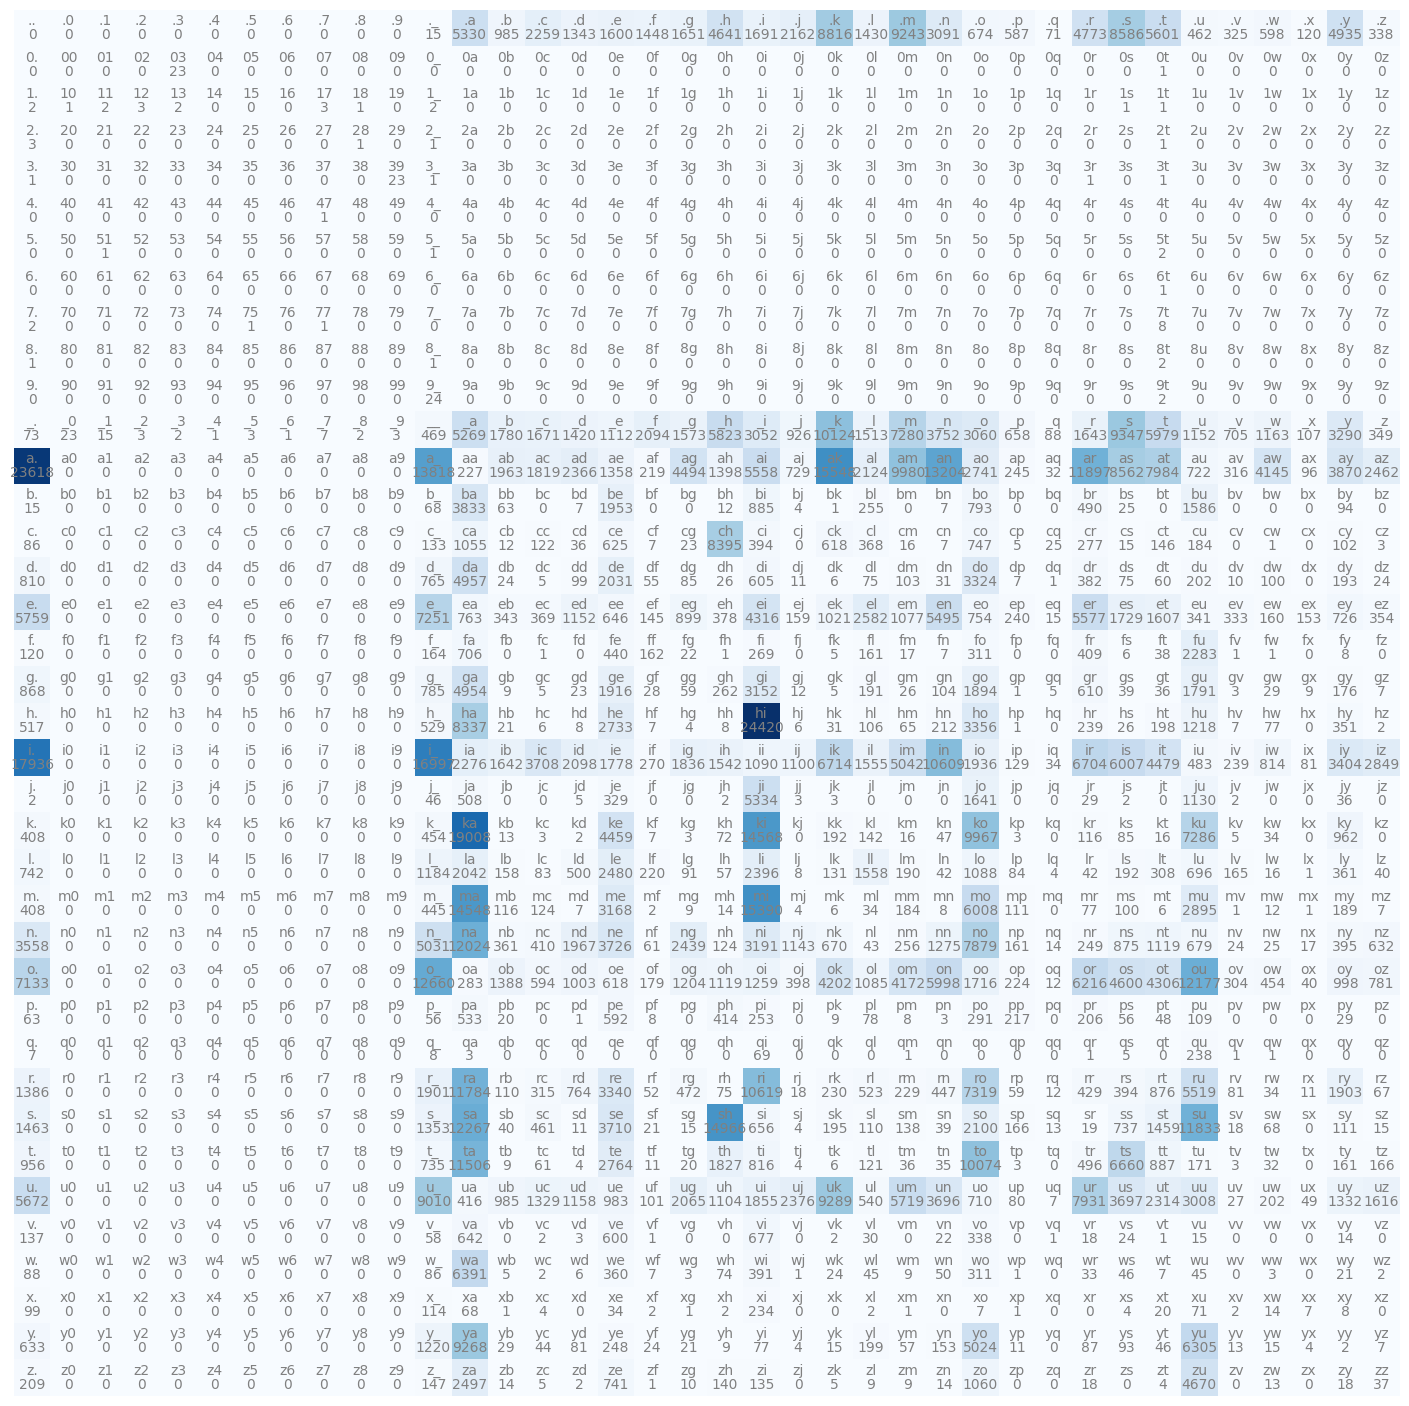

In [60]:
plt.figure(figsize = (18, 18))
plt.imshow(N, cmap = 'Blues')
for i in range(38):
    for j in range(38):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray')
plt.axis('off');

`Generator` = Creates and returns a generator object that manages the state of the algorithm which produces pseudo random numbers.

In [61]:
g = torch.Generator().manual_seed(42)
p = torch.rand(3, generator = g)
p = p/p.sum()
p

tensor([0.4047, 0.4197, 0.1756])

`multinomial` = Returns a tensor where each row contains `num_samples` indices sampled from the multinomial probability distribution located in the corresponding row of tensor `p`.

In [62]:
torch.multinomial(p, num_samples = 30, replacement = True, generator = g)

tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1,
        1, 0, 1, 2, 0, 0])

In [63]:
torch.multinomial(p, num_samples = 1, replacement = True, generator = g)

tensor([0])

### Without using bigram model, where each character has equal probability of following the other

In [70]:
g = torch.Generator().manual_seed(42)

for i in range(10):
    ix = 0
    result = []
    while True:
        p = torch.ones((38))/38
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        result.append(itos[ix])
        if ix == 0:
            break
    print(''.join(result))

n4dhnd7xk5rpft3am6_qsbou6lcn1.
qsssl3q2xlc34cv4qaeeb98rsfn1_y9qhovhfzidno9dki_8bejedsoccnor9sqhvkpaxjzmqyct2ae62v0umzckwsd8vfgiqcuyk6hjb9flf48zxdwnrgwcn2uv9o3zxv0omx1ec5i00zvnh_0_dw7xtnjwyac8xog8e0l04qvmwdmz4qr6nxmhfx32c834rlsb18y04u1itge02ajanv8m1mhsehky226rb1g.
12p5b53kjs7aff0pe80n26.
ic09.
vq9p70geoqpvdbtsalo7lhj423pam905u26f8chxs786l_n275qcj2yahxc_t38ppf2si6beo8a300cvdcura2s7u.
shqp36qa6qypqu6jbigmsh15kk0dblcb0x3w4y5xaj03u.
gja28vzy9se2hkelpm0tky1oy4.
p1r3h33x1exlr9iiwe.
2_xhmvf.
sl3hfh1xar198ds1_kj_nsvykoc.


### Using the bigram model

In [71]:
g = torch.Generator().manual_seed(42)

for i in range(10):
    ix = 0
    result = []
    while True:
        p = N[ix].float()
        p = p/p.sum()
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        result.append(itos[ix])
        if ix == 0:
            break
    print(''.join(result))


ni.
hawaxa.
r_fusami_shi.
relano.
issu_ku_ile.
potouseri_ara.
mo_yashiasuzude.
maki_laejedarosaorasagakatan.
mi.
cto.


In [72]:
p.shape

torch.Size([38])

### Making probability matrix for each column to avoid redundant calculations

In [73]:
P = N.float()
P.shape

torch.Size([38, 38])

In [81]:
P.sum(1, keepdim = True)e # take sum along axis = 1, ie, row wise sum

torch.Size([38, 1])

In [78]:
P.sum(1, keepdim = True).shape # column vector with sum of each rows

torch.Size([38, 1])

#### Broadcasting semantics pytorch - https://pytorch.org/docs/stable/notes/broadcasting.html

In [88]:
P = N.float()
P /= P.sum(1, keepdim = True)

In [89]:
P[0].sum()

tensor(1.)

### verifying the optimization

In [90]:
g = torch.Generator().manual_seed(42)

for i in range(10):
    ix = 0
    result = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        result.append(itos[ix])
        if ix == 0:
            break
    print(''.join(result))


ni.
hawaxa.
r_fusami_shi.
relano.
issu_ku_ile.
potouseri_ara.
mo_yashiasuzude.
maki_laejedarosaorasagakatan.
mi.
cto.


## Evaluating model

In [104]:
log_likelihood = 0.0
n = 1
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        n += 1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2] # probability assigned by model to the bigram
        # if model did not learn anything, then each bigram will have equal probability = 1/38
        # if model learns everything and is able to predict every next char, then probability = 1
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')
        
print(f'{log_likelihood = }') # the more the log_likelihood is -ve, the worse is the result. Best results are when log_likelihood = 0
nll = -log_likelihood # negative of log_likelihood
# we want a loss function so that we can minimize it. So, if we take -ve of LL, then the closer the value is to 0, the better are the results
print(f'{nll = }')
print(f'{nll/n = }') # normalized (averaged_) this we will use as our LOSS FUNCTION.

.p:  0.0081 -4.8201
pi:  0.0845 -2.4710
ie:  0.0172 -4.0627
e_:  0.1635 -1.8108
_a:  0.0698 -2.6627
a_:  0.0977 -2.3263
_l:  0.0200 -3.9105
la:  0.1372 -1.9860
a_:  0.0977 -2.3263
_m:  0.0964 -2.3394
mo:  0.1369 -1.9882
od:  0.0134 -4.3161
de:  0.1444 -1.9352
e.:  0.1299 -2.0412
log_likelihood = tensor(-38.9966)
nll = tensor(38.9966)
nll/n = tensor(2.5998)


### Evaluating entire set

In [108]:
log_likelihood = 0.0
n = 1
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        n += 1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
#         print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')
        
print(f'{log_likelihood = }')
nll = -log_likelihood
print(f'{nll = }')
print(f'{nll/n = }') 

log_likelihood = tensor(-2467315.)
nll = tensor(2467315.)
nll/n = tensor(2.3660)


* Log likelihood can be calculated for any word

In [110]:
log_likelihood = 0.0
n = 1
for w in ['abhay']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        n += 1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')
        
print(f'{log_likelihood = }')
nll = -log_likelihood
print(f'{nll = }')
print(f'{nll/n = }') 

.a:  0.0732 -2.6140
ab:  0.0139 -4.2778
bh:  0.0012 -6.7345
ha:  0.1962 -1.6284
ay:  0.0274 -3.5990
y.:  0.0267 -3.6223
log_likelihood = tensor(-22.4761)
nll = tensor(22.4761)
nll/n = tensor(3.2109)


##### Observation- 
loss is high because probability of 'h' after 'b' is quite low.

In [114]:
log_likelihood = 0.0
n = 1
for w in ['abhqay']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        n += 1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')
        
print(f'{log_likelihood = }')
nll = -log_likelihood
print(f'{nll = }')
print(f'{nll/n = }') 

.a:  0.0732 -2.6140
ab:  0.0139 -4.2778
bh:  0.0012 -6.7345
hq:  0.0000 -inf
qa:  0.0090 -4.7125
ay:  0.0274 -3.5990
y.:  0.0267 -3.6223
log_likelihood = tensor(-inf)
nll = tensor(inf)
nll/n = tensor(inf)


##### Observation-
* issue found
* loss comes out to be `infinite` because 'hq' has 0 probability
##### Fix (Model smoothing)
add 1 to every entry in our frequency (`N`) table.

In [115]:
P = (N+1).float()
P /= P.sum(1, keepdim = True)

In [117]:
log_likelihood = 0.0
n = 1
for w in ['abhqay']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        n += 1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')
        
print(f'{log_likelihood = }')
nll = -log_likelihood
print(f'{nll = }')
print(f'{nll/n = }') 

.a:  0.0732 -2.6144
ab:  0.0139 -4.2775
bh:  0.0013 -6.6582
hq:  0.0000 -10.6578
qa:  0.0108 -4.5326
ay:  0.0274 -3.5990
y.:  0.0267 -3.6223
log_likelihood = tensor(-35.9618)
nll = tensor(35.9618)
nll/n = tensor(4.4952)


# Neural Network Model

### We are creating a neural network with only a single layer (ie the output layer)

### creating training set of bigrams (x, y)

In [121]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [122]:
xs, ys

(tensor([ 0, 27, 20, 16, 11, 12, 11, 23, 12, 11, 24, 26, 15, 16]),
 tensor([27, 20, 16, 11, 12, 11, 23, 12, 11, 24, 26, 15, 16,  0]))

### One hot encoding

In [123]:
import torch.nn.functional as F

In [131]:
xenc = F.one_hot(xs, num_classes = 38).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0.

In [132]:
xenc.shape

torch.Size([14, 38])

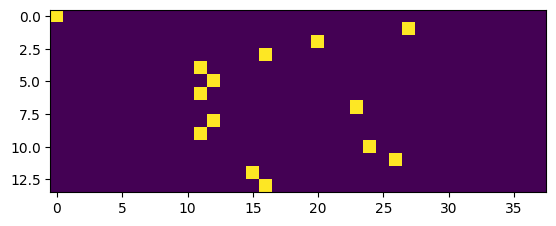

In [133]:
plt.imshow(xenc);

In [138]:
W = torch.randn((38, 38))

In [139]:
(xenc @ W) # DOT product  

tensor([[ 0.4681, -0.1573,  0.2957,  0.9044,  0.6358, -0.0055,  0.9887, -0.9008,
         -0.0259, -0.5301,  0.4641,  0.5858, -1.6142, -1.1188, -0.6537,  0.5658,
          0.2382,  0.2017, -0.2665, -1.5105, -0.0946,  0.2242,  0.8229, -0.9253,
         -1.7615, -0.3516,  1.2111, -1.8324, -1.9058,  0.3266,  0.3492, -0.2871,
          2.0621,  0.5845,  0.8337, -0.9411, -0.7382, -1.3234],
        [-0.5322, -0.0338,  0.8100, -0.2758, -0.8450, -0.3432,  1.2146,  1.0953,
         -0.6005, -0.0121, -0.8689, -2.6064, -0.2756, -0.3241,  0.4492, -0.5525,
          0.1846,  0.5358, -0.1112,  1.0215,  0.4122, -0.5405, -0.7646,  0.5643,
         -0.7198,  0.2157, -1.0541,  1.5825,  0.8931,  0.2452, -0.9690, -0.3696,
          0.7089,  0.6159, -0.0597, -1.5383,  1.0294, -0.0062],
        [ 0.5014,  0.0880,  0.3008,  0.1823, -0.3705,  0.3776, -1.1892,  0.4552,
          0.9890, -0.9975, -0.1356, -0.5802,  0.7772,  0.5564,  0.3829,  1.6614,
         -0.1878, -0.2488, -0.5207,  1.4547,  0.2439, -0.2425,

In [142]:
logits = (xenc @ W) # log-counts
counts = logits.exp() # all numbers become +ve. Can be treated as frequency of each bigram
counts # equivalent to N matrix of statistical model

tensor([[1.5969, 0.8544, 1.3441, 2.4706, 1.8886, 0.9946, 2.6878, 0.4063, 0.9745,
         0.5885, 1.5905, 1.7964, 0.1991, 0.3267, 0.5201, 1.7608, 1.2690, 1.2235,
         0.7660, 0.2208, 0.9097, 1.2513, 2.2772, 0.3964, 0.1718, 0.7036, 3.3573,
         0.1600, 0.1487, 1.3863, 1.4179, 0.7505, 7.8628, 1.7940, 2.3018, 0.3902,
         0.4780, 0.2662],
        [0.5873, 0.9667, 2.2479, 0.7589, 0.4296, 0.7095, 3.3690, 2.9900, 0.5486,
         0.9880, 0.4194, 0.0738, 0.7591, 0.7232, 1.5671, 0.5755, 1.2028, 1.7088,
         0.8947, 2.7773, 1.5102, 0.5824, 0.4655, 1.7582, 0.4868, 1.2407, 0.3485,
         4.8672, 2.4427, 1.2779, 0.3795, 0.6910, 2.0318, 1.8514, 0.9420, 0.2147,
         2.7993, 0.9938],
        [1.6510, 1.0920, 1.3510, 1.2000, 0.6904, 1.4588, 0.3045, 1.5765, 2.6885,
         0.3688, 0.8732, 0.5598, 2.1754, 1.7444, 1.4665, 5.2667, 0.8288, 0.7797,
         0.5941, 4.2834, 1.2763, 0.7847, 0.7552, 6.5475, 2.3657, 0.6864, 2.9459,
         3.6266, 1.4674, 1.0971, 0.6091, 0.1637, 0.3066, 

In [143]:
probs = counts/counts.sum(1, keepdim = True)
probs

tensor([[0.0323, 0.0173, 0.0272, 0.0499, 0.0382, 0.0201, 0.0543, 0.0082, 0.0197,
         0.0119, 0.0321, 0.0363, 0.0040, 0.0066, 0.0105, 0.0356, 0.0256, 0.0247,
         0.0155, 0.0045, 0.0184, 0.0253, 0.0460, 0.0080, 0.0035, 0.0142, 0.0678,
         0.0032, 0.0030, 0.0280, 0.0286, 0.0152, 0.1588, 0.0362, 0.0465, 0.0079,
         0.0097, 0.0054],
        [0.0119, 0.0197, 0.0457, 0.0154, 0.0087, 0.0144, 0.0685, 0.0608, 0.0112,
         0.0201, 0.0085, 0.0015, 0.0154, 0.0147, 0.0319, 0.0117, 0.0245, 0.0347,
         0.0182, 0.0565, 0.0307, 0.0118, 0.0095, 0.0358, 0.0099, 0.0252, 0.0071,
         0.0990, 0.0497, 0.0260, 0.0077, 0.0141, 0.0413, 0.0376, 0.0192, 0.0044,
         0.0569, 0.0202],
        [0.0261, 0.0173, 0.0213, 0.0190, 0.0109, 0.0231, 0.0048, 0.0249, 0.0425,
         0.0058, 0.0138, 0.0088, 0.0344, 0.0276, 0.0232, 0.0832, 0.0131, 0.0123,
         0.0094, 0.0677, 0.0202, 0.0124, 0.0119, 0.1035, 0.0374, 0.0108, 0.0465,
         0.0573, 0.0232, 0.0173, 0.0096, 0.0026, 0.0048, 

In [146]:
probs.shape

torch.Size([14, 38])

In [147]:
probs[0].sum()

tensor(1.0000)

## Organizing work

In [148]:
xs

tensor([ 0, 27, 20, 16, 11, 12, 11, 23, 12, 11, 24, 26, 15, 16])

In [149]:
ys

tensor([27, 20, 16, 11, 12, 11, 23, 12, 11, 24, 26, 15, 16,  0])

In [163]:
# randomly initialize 38 neurons' weights. each neuron recieves 38 inputs
g = torch.Generator().manual_seed(42)
W = torch.randn((38, 38), generator = g, requires_grad = True)

In [164]:
xenc = F.one_hot(xs, num_classes = 38).float() # input to the network: one hot encoded
logits = xenc @ W # predict log-counts
# Following step is equivalent to calculating softmax
counts = logits.exp() # equivalent to N matrix
probs = counts / counts.sum(1, keepdim = True) # probabilities of next character

In [165]:
probs.shape

torch.Size([14, 38])

In [166]:
nlls = torch.zeros(14)
for i in range(14):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # next character index (target)
    print()
    print('--------------------')
    print()
    print(f'Bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print(f'input to the neural network: {x}')
    print('output probabilities from the neural net: ', probs[i])
    print('label (actual next character)', y)
    p = probs[i, y]
    print('probability assigned by the neural net to the correct character:', p)
    logp = torch.log(p)
    print('log likelihood', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('_____________________')
print()
print('average -ve log likelihood (loss function)', nlls.mean().item())
    
    


--------------------

Bigram example 1: .p (indexes 0, 27)
input to the neural network: 0
output probabilities from the neural net:  tensor([0.0932, 0.0601, 0.0334, 0.0017, 0.0268, 0.0039, 0.0130, 0.0027, 0.0064,
        0.0706, 0.0092, 0.0033, 0.0066, 0.0078, 0.0063, 0.0291, 0.0701, 0.0116,
        0.0083, 0.0211, 0.0064, 0.0399, 0.0302, 0.0729, 0.0488, 0.0496, 0.0250,
        0.0516, 0.0108, 0.0142, 0.0106, 0.0321, 0.0034, 0.0057, 0.0109, 0.0756,
        0.0187, 0.0089], grad_fn=<SelectBackward0>)
label (actual next character) 27
probability assigned by the neural net to the correct character: tensor(0.0516, grad_fn=<SelectBackward0>)
log likelihood -2.964858293533325
negative log likelihood: 2.964858293533325

--------------------

Bigram example 2: pi (indexes 27, 20)
input to the neural network: 27
output probabilities from the neural net:  tensor([0.0032, 0.0308, 0.0148, 0.0169, 0.0030, 0.0073, 0.0539, 0.0241, 0.0155,
        0.0141, 0.0043, 0.0304, 0.0147, 0.0207, 0.0111, 0.014

## OPTIMIZATION

In [175]:
# create the dataset
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# initializing the network
g = torch.Generator().manual_seed(42)
W = torch.randn((38, 38), generator = g, requires_grad = True)

number of examples: 1042819


In [177]:
# gradient descent
for k in range(50):
    
    # forward pass
    xenc = F.one_hot(xs, num_classes = 38).float() # one hot encoded input to the network
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # frequency
    probs = counts / counts.sum(1, keepdim = True) # probabilities for next char
    loss = -probs[torch.arange(num), ys].log().mean() # average -ve log likelihood
    print(loss.item())
    
    # backward pass
    W.grad = None # sets the grad to 0
    loss.backward()
    
    # update
    W.data += -50 * W.grad

4.169409275054932
3.793692111968994
3.5140886306762695
3.2953224182128906
3.1293351650238037
3.0058748722076416
2.912519931793213
2.840477705001831
2.7839903831481934
2.7389063835144043
2.702280044555664
2.672104597091675
2.646982192993164
2.6258702278137207
2.6079564094543457
2.592599630355835
2.579298973083496
2.567662239074707
2.5573840141296387
2.5482254028320312
2.5399980545043945
2.5325539112091064
2.5257744789123535
2.5195653438568115
2.5138497352600098
2.5085651874542236
2.503660202026367
2.4990909099578857
2.4948220252990723
2.4908218383789062
2.4870638847351074
2.483525514602661
2.4801864624023438
2.477029323577881
2.474038600921631
2.471200942993164
2.468503713607788
2.4659361839294434
2.4634883403778076
2.4611520767211914
2.458919048309326
2.456782341003418
2.454735040664673
2.4527716636657715
2.4508869647979736
2.44907546043396
2.447333574295044
2.445657253265381
2.4440417289733887
2.4424848556518555


## Sampling from neural net model

In [184]:
g = torch.Generator().manual_seed(42)

for i in range(10):
    
    result = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 38).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim = True)
        
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        result.append(itos[ix])
        if ix == 0:
            break
    print(''.join(result))
        

ni.
hndoxsur_fusami_shi.
relcno.
issu_ku_ile.
plv43anei_8ra.
mo_yashivbuzu_no_hokilaejo.
so_saorasagakatan.
mi.
cto.
esunanme_koshijf2iqchika_jbawa.
